# Descriptive statistics
## Practical example

In [1]:
import pandas as pd
#Import the data and change it to DataFrame

product = pd.read_csv('C:\\Users\\santi\\OneDrive\\Bureau\\IAD\\Semestre 4\\Business-Intelligence\\Laboratorios\\Laboratorio 2.13\\Product.csv', delimiter=';')
customer = pd.read_csv('C:\\Users\\santi\\OneDrive\\Bureau\\IAD\\Semestre 4\\Business-Intelligence\\Laboratorios\\Laboratorio 2.13\\costumers.csv', delimiter=';')
df_pro = pd.DataFrame(product)
df_cus = pd.DataFrame(customer)

In [2]:
df_pro.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,"$246.172,68",Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,"$246.331,90",Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,"$209.280,91",Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,"$452.667,01",Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,"$467.083,31",Sold


In [3]:
df_cus.head()

,Customer ID,Entity,Name,Surname,Age at time of purchase,Interval,Y,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,C0028,Individual,Madalyn,Mercer,19,18-25,1986,F,USA,California,Home,5,No,Website
1,C0027,Individual,Lara,Carrillo,22,18-25,1983,F,USA,California,Home,5,No,Website
2,C0112,Individual,Donavan,Flowers,22,18-25,1985,M,USA,California,Home,1,Yes,Client
3,C0160,Individual,Darien,Dorsey,22,18-25,1985,M,USA,California,Investment,3,Yes,Website
4,C0014,Individual,Alessandra,Perry,25,18-25,1979,F,USA,California,Home,4,No,Agency


## Task 1:
What are the types of data and the levels of measurement of the following variables: Cust ID, Mortgage, Year of sale

In [4]:
print("Customer ID == ", df_cus['Customer ID'].dtype," Level of mesurement = Nominal")
print("Mortgage == ", df_cus['Mortgage'].dtype," Level of mesurement = Nominal")
print("Year of sale == ", df_pro['Year of sale'].dtype," Level of mesurement = Ratio")

Customer ID ==  object  Level of mesurement = Nominal
Mortgage ==  object  Level of mesurement = Nominal
Year of sale ==  float64  Level of mesurement = Ratio


## Task 2:
Create a frequency distribution graph representing the price (that is a histogram with the highest possible number of bins - 272). Use data on all apartments and offices, no matter if sold or not.


In [5]:
#This function help to change the type of data in the column Price to type float
def replace(string, looking_for, replace_for):
    new = ""
    for letter in string:
        if letter == looking_for:
            new += replace_for
        else:
            new += letter
    return new

x = 0 
for space in df_pro['Price']:
    df_pro.loc[x,'Price'] = df_pro.loc[x,'Price'].replace(space,space.strip())
    x += 1
y = 0 
for dolar in df_pro['Price']:
    df_pro.loc[y,'Price'] = df_pro.loc[y,'Price'].replace(dolar,dolar[1:])
    y += 1
z = 0 
for dot in df_pro['Price']:    
    df_pro.loc[z,'Price'] = replace(dot,".","")
    z += 1
w = 0
for coma in df_pro['Price']:
    df_pro.loc[w,'Price'] = replace(coma,",",".")
    w += 1

df_pro['Price'] = df_pro['Price'].astype(float)

#Generate the No sold category on the column Status
df_pro['Status'] =df_pro['Status'].fillna('No sold')

In [6]:
#New DataFrame for the products:
df_pro.head() 

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246172.68,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246331.90,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209280.91,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452667.01,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467083.31,Sold


In [7]:
df_pro.dtypes

ID                    int64
Building              int64
Year of sale        float64
Month of sale       float64
Type of property     object
Property #            int64
Area (ft.)          float64
Price               float64
Status               object
dtype: object

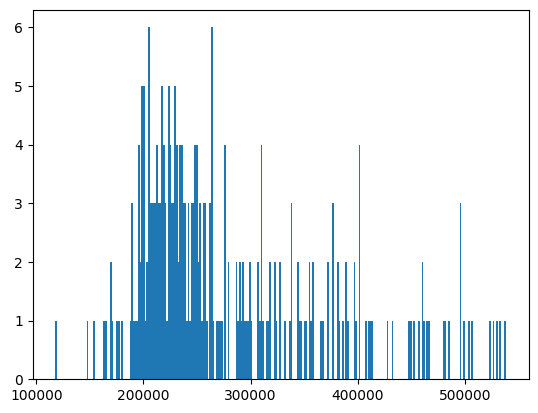

In [8]:
import matplotlib.pyplot as plt

plt.hist(df_pro['Price'], bins=272)
plt.show()

## Task 3: 
Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. If you don't know how to do that, refer to the Course notes on descriptive statistics provided with the first lecture in this section.
Use the data on all properties, no matter if sold or not.

In [9]:
inter = [100000,200000,300000,400000,500000,600000]

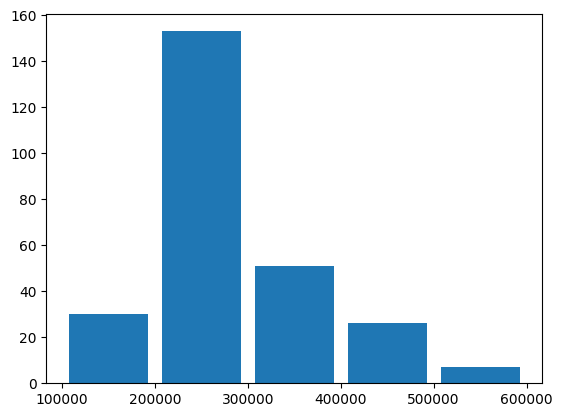

In [10]:
import matplotlib.pyplot as plt
plt.hist(x=df_pro['Price'], bins=inter, rwidth=0.85)
plt.xticks(inter)
plt.show()

## Task 4: 
Interpret the results.

### R:

With this results is possible to know thar almost all the properties in the dataset have a price between 200000 and 300000 dollars.

## Task 5: 
Create a scatter plot showing the relationship between Price and Area. Use the data on all properties, no matter if sold or not. Interpret the results.

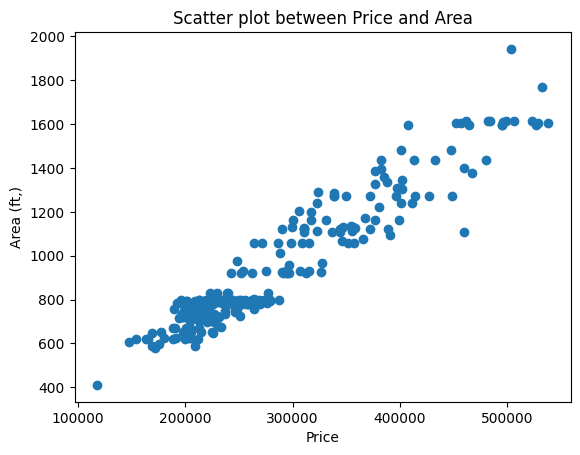

In [11]:
fig, ax=plt.subplots()
ax.scatter(df_pro['Price'],df_pro['Area (ft.)'])
plt.xlabel('Price')
plt.ylabel('Area (ft,)')
plt.title('Scatter plot between Price and Area')

plt.show()

### R:
This graph show that there is a correlation between the price and the area of the properties.

## Task 6: 
Create a frequency distribution table, where you list all the countries from which the company has buyers (country vs number of buyers). Count the absolute frequency, the relative frequency and the cumulative frequency. 


In [12]:
fre_dis = pd.DataFrame(pd.value_counts(df_cus['Country']))
fre_dis.columns = ["Absolute frequency"]

fre_dis['Relative frequency'] = fre_dis['Absolute frequency']/len(df_cus['Country'])

acum = []
values_acum = 0
for i in fre_dis['Relative frequency']:
    values_acum += i
    acum.append(values_acum)
fre_dis['Cumulative frequency'] = acum

fre_dis

,Absolute frequency,Relative frequency,Cumulative frequency
USA,160,0.898876,0.898876
Canada,7,0.039326,0.938202
Russia,4,0.022472,0.960674
UK,2,0.011236,0.971910
Belgium,2,0.011236,0.983146
Denmark,1,0.005618,0.988764
Germany,1,0.005618,0.994382
Mexico,1,0.005618,1.000000


## Task 7: 
Create a Pareto diagram representing the data.

C:\Users\santi\AppData\Local\Temp\ipykernel_2144\1901394102.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fre_dis.index, rotation= 90)


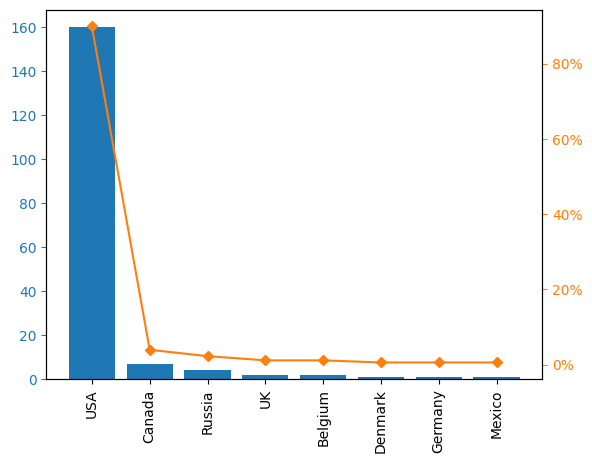

In [13]:
from matplotlib.ticker import PercentFormatter
Pareto = plt.figure()
ax = Pareto.add_subplot(1,1,1)
ax.bar(fre_dis.index, fre_dis['Absolute frequency'], color = 'C0')
ax2 = ax.twinx()
ax2.plot(fre_dis.index, fre_dis['Relative frequency']*100, color="C1", marker='D', ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors = 'C0')
ax2.tick_params(axis='y', colors ='C1')
ax.set_xticklabels(fre_dis.index, rotation= 90)

plt.show()

## Task 8: 
Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all properties, no matter if sold or not.

In [14]:
import statistics as st
print('The mean is : ',round(st.mean(df_pro['Price']),2))
print('The median is : ',round(st.median(df_pro['Price']),2))
print('The mode is : ',round(st.mode(df_pro['Price']),2))
ske = df_pro['Price']
print('The skewness is : ',round(ske.skew(),2))
print('The variance is : ',round(st.variance(df_pro['Price']),2))
print('The standar derivation is : ',round(st.stdev(df_pro['Price']),2))

The mean is :  281171.9
The median is :  249075.66
The mode is :  460001.26
The skewness is :  1.1
The variance is :  7942217728.65
The standar derivation is :  89119.12


## Task 9: 
Interpret the measures.

### R:
Whit this results is possible to see that there is a big positive skewness of the data, this means that the majority of the prices are lower than 249075,66. Also is possible to see that the variance is high, making sense with the affirmation. 

## Task 10: 
Calculate the covariance and correlation coefficient between Price and Area, no matter if the property is sold or not. Is the result in line with the scatter plot?

In [15]:
print("The covariance is : ",st.covariance(df_pro['Price'], df_pro['Area (ft.)']), " It's accord to the scatter plot")
print("The correlation is : ",st.correlation(df_pro['Price'], df_pro['Area (ft.)']), " It's accord to the scatter plot")

The covariance is :  24147707.289082766  It's accord to the scatter plot
The correlation is :  0.9510873336790353  It's accord to the scatter plot
